<a href="https://colab.research.google.com/github/khalidakram07/Finance/blob/main/Proton_internshala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
#1
import numpy as np
from sklearn.model_selection import train_test_split
from pandas import read_csv
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

In [135]:
#2
!pip install -U -q PyDrive
import pandas as pd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': "1CwB2ubKL711Mm0lq78FgjVxS-4qwYPKu"}) 
downloaded.GetContentFile('tough_dataset.csv')  



In [136]:
# To store the data
import pandas as pd

# To do linear algebra
import numpy as np

# To map Country-Names to ISO Country-Codes
!pip install pycountry

import pycountry

# To create interactive maps
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To create plots
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To search strings
import re

Checking the dataset

In [137]:

df = read_csv('tough_dataset.csv', header=0,index_col=[0], parse_dates=[0])
df.head()

,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer’s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months

It seems that the dataset contains two target columns.
By analysing the columns of independent variables and dependent variables we can assume that 
Target A is loan amount and Target B is loan approved-1 or loan rejected as 0 because columns such as "purpose","loan status","term","paymnt_plan","earliest_cr_line","last_pymnt_d","last_pymnt_amnt",	"next_pymnt_d","last_credit_pull_d" gives details for taking loan.

Before splitting dataset for training and test set lets remove irrelavant columns to avoid redundant coding

Becuase the dataset contains 66 columns lets split them in 3 groups and analyse each group individually

In [138]:
print(df.columns.tolist())

['Target A', 'Target B', 'LOAN_AMT', 'Business Title', 'Civil Service Title', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Residency Requirement', 'Posting Date', 'Posting Updated', 'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology', 'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture', 'Age', 'term', 'emp_length', 'loan_sta

Splitting the dataset in 80-20 ratio for training and test sets

In [139]:
y=df[['Target A','Target B']]
y

,Target A,Target B
id,,
68407277,42405.00,0
68355089,60740.00,1
68341763,51907.68,0
66310712,51907.68,0
68476807,35.00,1
...,...,...
68394526,67757.00,0
68404684,67757.00,1
68414567,54100.00,0


In [140]:
x=df.loc[:, ~df.columns.isin(['Target A', 'Target B'])]
x.head(1)

,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar


In [141]:
df.describe()

,Target A,Target B,LOAN_AMT,dti,last_pymnt_amnt
count,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000
mean,58904.139794,0.210115,15345.663612,19.444117,4663.227026
std,26986.575936,0.407460,8636.391303,8.628543,6855.297610
min,0.000000,0.000000,1000.000000,0.000000,0.030000
25%,49390.000000,0.000000,8681.250000,13.035000,362.980000
50%,58440.000000,0.000000,14400.000000,18.905000,842.235000
75%,73171.750000,0.000000,20000.000000,25.580000,6832.185000
max,218587.000000,1.000000,35000.000000,51.200000,35467.750000


In [142]:
df.shape

(2946, 68)

In [143]:
df.isnull().sum()

Target A                  0
Target B                  0
LOAN_AMT                  0
Business Title            0
Civil Service Title       0
                       ... 
earliest_cr_line          0
last_pymnt_d              0
last_pymnt_amnt           0
next_pymnt_d           2610
last_credit_pull_d        0
Length: 68, dtype: int64

In [144]:
df.isnull().sum().sum()

35703

In [ ]:
for i in range(len(df.index)) :
    print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())

In [146]:
df.dtypes

Target A               float64
Target B                 int64
LOAN_AMT                 int64
Business Title          object
Civil Service Title     object
                        ...   
earliest_cr_line        object
last_pymnt_d            object
last_pymnt_amnt        float64
next_pymnt_d            object
last_credit_pull_d      object
Length: 68, dtype: object

# Visualizing dataset to understand the significance of columns 

column "next_paymnt_d" has 2610 empty values. 

# Loan amount distribution

Mean loan amount is:  15345.66361167685


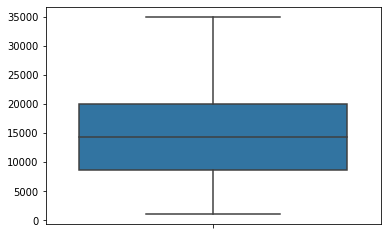

In [147]:
loan_amount = df["LOAN_AMT"].values
sns.boxplot(y=loan_amount)
print ("Mean loan amount is: ",loan_amount.mean())
# Most loans were between 10000 and 20000 dollars

# Loan Amount

In [148]:
'''
loan_counts = df.LOAN_AMT.value_counts()[1:]
# Removing current loans as they will not be useful for our analysis
plt.figure(figsize=(24,8))
plt.grid()
ax = sns.barplot(loan_counts.index, loan_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan  Counts")'''

'\nloan_counts = df.LOAN_AMT.value_counts()[1:]\n# Removing current loans as they will not be useful for our analysis\nplt.figure(figsize=(24,8))\nplt.grid()\nax = sns.barplot(loan_counts.index, loan_counts.values)\nax.set_xticklabels(ax.get_xticklabels(),rotation=45)\nprint("Loan  Counts")'

In [149]:
'''
#order_age = ['1000>= or =<5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '35000 or more']

plt.figure(figsize=(14,4))
plt.grid()
sns.countplot(data=df, x='LOAN_AMT', order=order_age, palette='viridis')
plt.title("Loan amount")
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()'''

'\n#order_age = [\'1000>= or =<5000\', \'5000-10000\', \'10000-15000\', \'15000-20000\', \'20000-25000\', \'25000-30000\', \'35000 or more\']\n\nplt.figure(figsize=(14,4))\nplt.grid()\nsns.countplot(data=df, x=\'LOAN_AMT\', order=order_age, palette=\'viridis\')\nplt.title("Loan amount")\nplt.ylabel(\'Count\')\nplt.xticks(rotation=60)\nplt.show()'

In [199]:
df["Hours/Shift"].value_counts()

35 Hours                                                                                                                                                                                                                                                   134
35 hours per week                                                                                                                                                                                                                                           47
Day - Due to the necessary technical support duties of this position in a 24/7 operation, candidate may be required to work various shifts such as weekends and/or nights/evenings.                                                                         38
35 hours per week / day                                                                                                                                                                                                                    

# Loan Status

In [150]:
df.loan_status.value_counts()

Fully Paid            2154
Charged Off            456
Current                319
Late (31-120 days)      14
In Grace Period          2
Late (16-30 days)        1
Name: loan_status, dtype: int64

Loan Statuses Counts


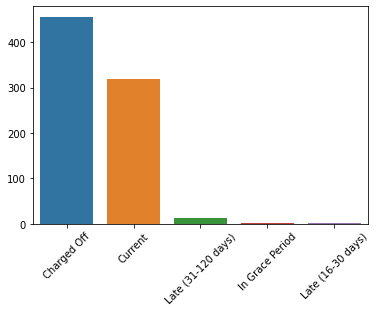

In [151]:
status_counts = df.loan_status.value_counts()[1:]
ax = sns.barplot(status_counts.index, status_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan Statuses Counts")

# Loan analysis

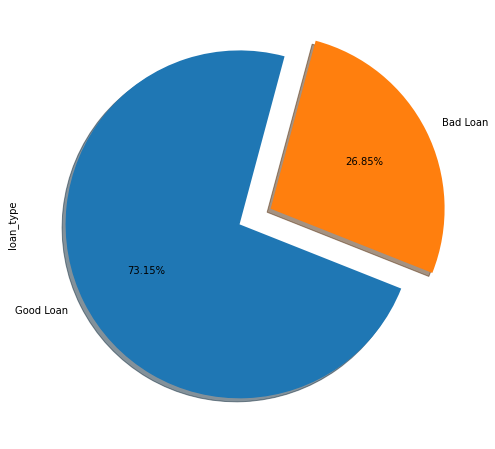

In [152]:
# Bad Loans analysis

# Various types of bad loans
bad_loan = ["Charged Off", "Current", "Late (31-120 days)","In Grace Period"]

# Creating an empty column to store the laon type
df['loan_type'] = np.nan

# Function to set the loan type
def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
# Applying the function to all the statuses    
df['loan_type'] = df['loan_status'].apply(loan_type)

# Making a pie chart of good loans and bad loans
plt.figure(figsize=(8,8))
df.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75)
# 26.85% of all loans were bad loans

In [153]:
df.head(1)

,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,loan_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,42405.0,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar,Good Loan


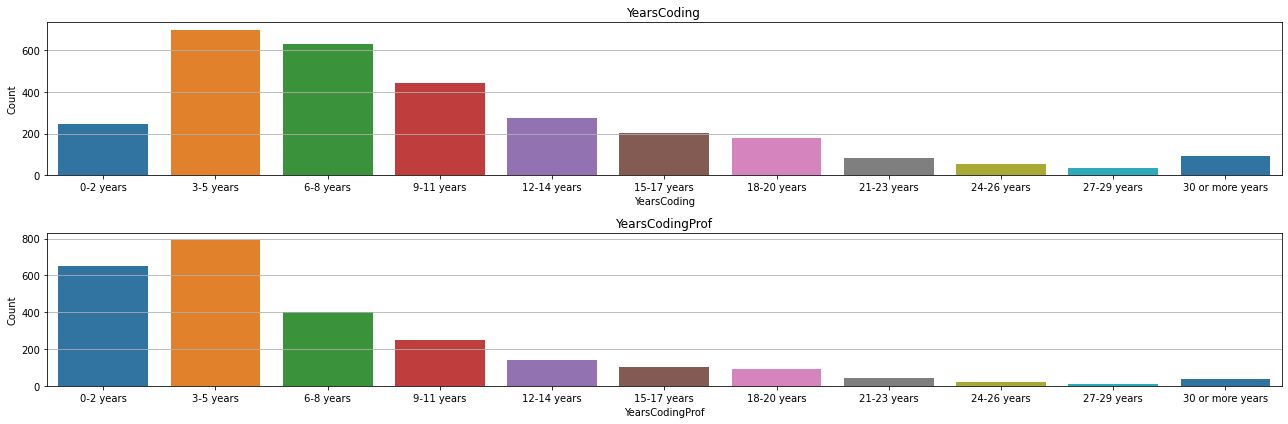

In [154]:
fig, axarr = plt.subplots(2,1, figsize=(18,6))

order_yearscoding = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years']

axarr[0].grid()
sns.countplot(data=df, x='YearsCoding', order=order_yearscoding, palette='tab10', ax=axarr[0])
axarr[0].set_title('YearsCoding')
axarr[0].set_ylabel('Count')

order_yearscodingprof = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years']

axarr[1].grid()
sns.countplot(data=df, x='YearsCodingProf', order=order_yearscodingprof, palette='tab10', ax=axarr[1])
axarr[1].set_title('YearsCodingProf')
axarr[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Purpose

In [155]:
np.unique(df['purpose'])

array(['car', 'credit_card', 'debt_consolidation', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation'], dtype=object)

Text(0, 0.5, 'Count')

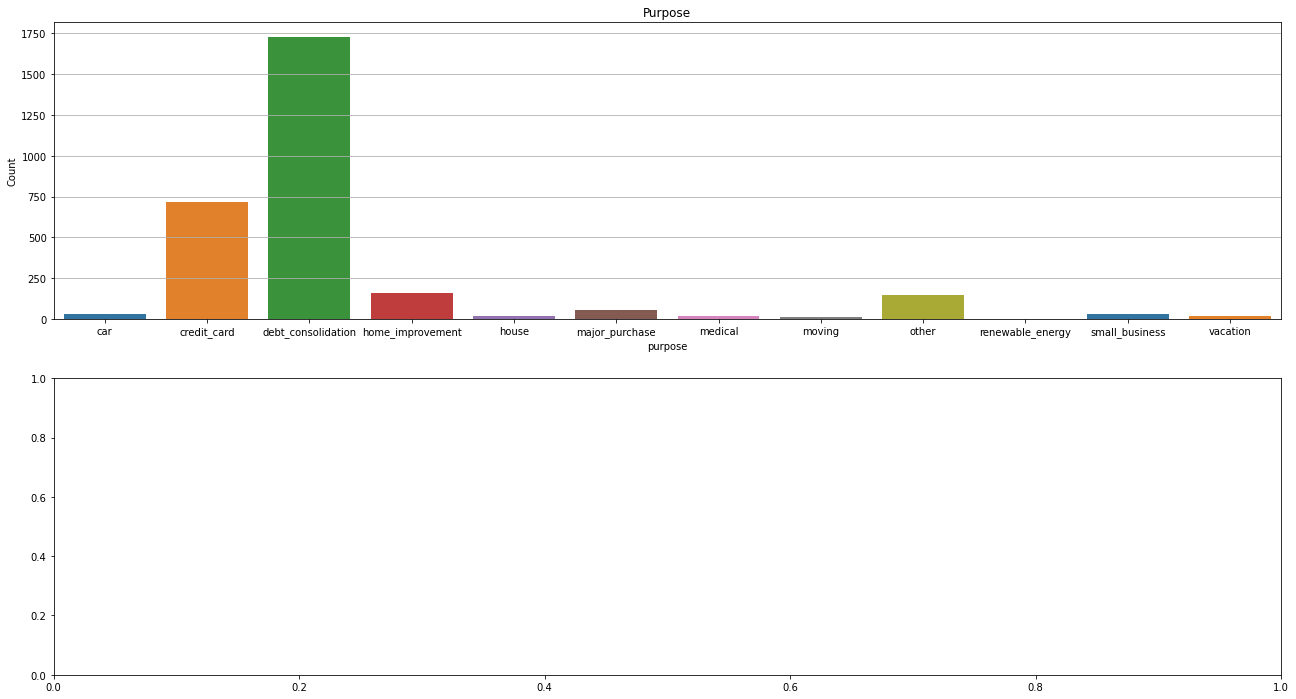

In [156]:
fig, axarr = plt.subplots(2, figsize=(22,12))

purpose_cat = ['car', 'credit_card', 'debt_consolidation', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation']

axarr[0].grid()
sns.countplot(data=df, x='purpose', order=purpose_cat, palette='tab10', ax=axarr[0])
axarr[0].set_title('Purpose')
axarr[0].set_ylabel('Count')



# MinimumQualification

In [157]:
df.rename(columns={'Minimum Qual Requirements': 'Minimum_Qual_Requirements'}, inplace=True)


# Undermajor

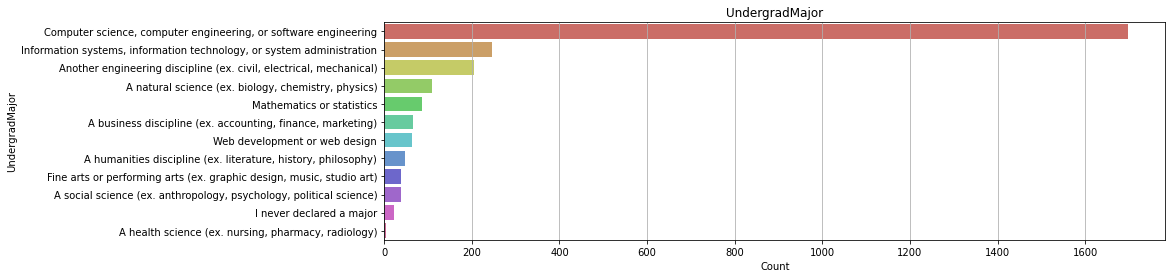

In [158]:
plt.figure(figsize=(14,4))
plt.grid()
sns.countplot(data=df, y='UndergradMajor', order=df.UndergradMajor.value_counts().index, palette='hls')
plt.title('UndergradMajor')
plt.xlabel('Count')
plt.show()

# CompanySize

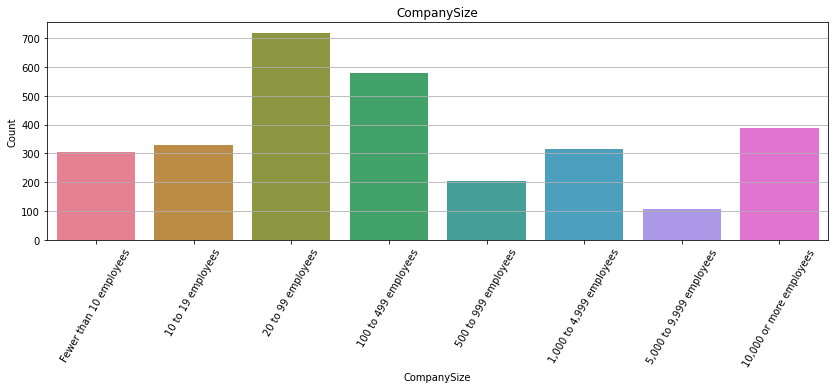

In [159]:
order_companysize = ['Fewer than 10 employees','10 to 19 employees','20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']

plt.figure(figsize=(14,4))
plt.grid()
sns.countplot(data=df, x='CompanySize', order=order_companysize, palette='husl')
plt.title('CompanySize')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

# DevType

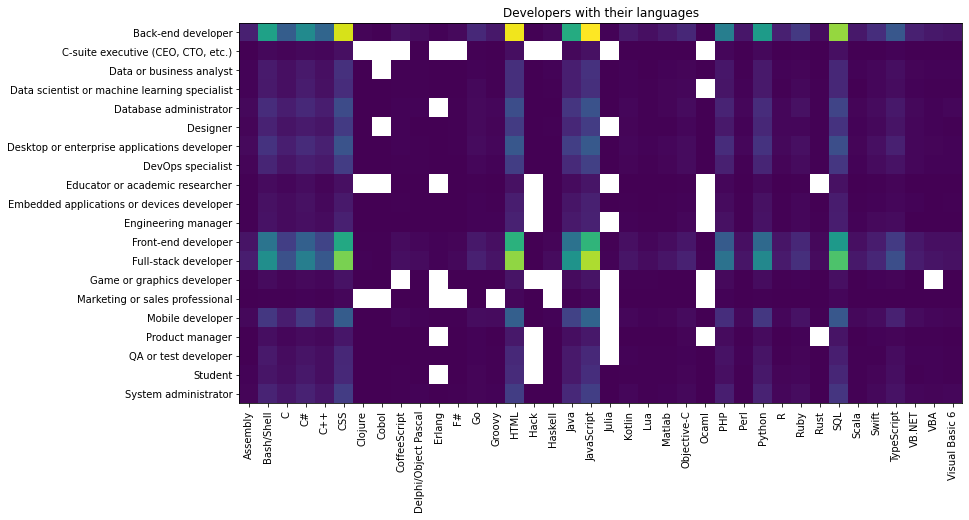

In [160]:
a = pd.DataFrame.from_records(df['DevType'].dropna().apply(lambda x: x.split(';') if type(x)==str else x).tolist()).stack().rename('DevType').to_frame()
a.index = a.index.get_level_values(0)
b = pd.DataFrame.from_records(df['LanguageWorkedWith'].dropna().apply(lambda x: x.split(';') if type(x)==str else x).tolist()).stack().rename('LanguageWorkedWith')
b.index = b.index.get_level_values(0)
dev_lang = a.join(b).assign(N=1).pivot_table(index='DevType', columns='LanguageWorkedWith', values='N', aggfunc='count')
mat = dev_lang.div(dev_lang.sum().sum()).values

plt.figure(figsize=(14,7))
plt.title('Developers with their languages')
plt.xticks(range(dev_lang.shape[1]), dev_lang.columns, rotation='vertical')
plt.yticks(range(dev_lang.shape[0]), dev_lang.index)
plt.imshow(mat)
plt.show()

# LastNewJob

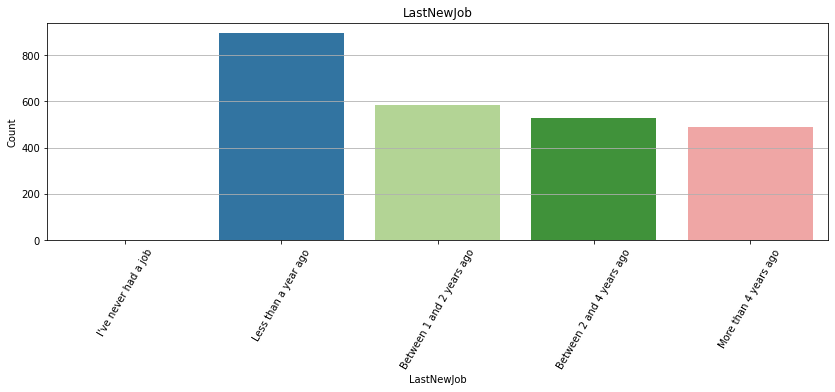

In [161]:
order_lastnewjob = ["I've never had a job", 'Less than a year ago', 'Between 1 and 2 years ago', 'Between 2 and 4 years ago', 'More than 4 years ago']

plt.figure(figsize=(14,4))
plt.grid()
sns.countplot(data=df, x='LastNewJob', order=order_lastnewjob, palette='Paired')
plt.title('LastNewJob')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

# HopeFiveYears

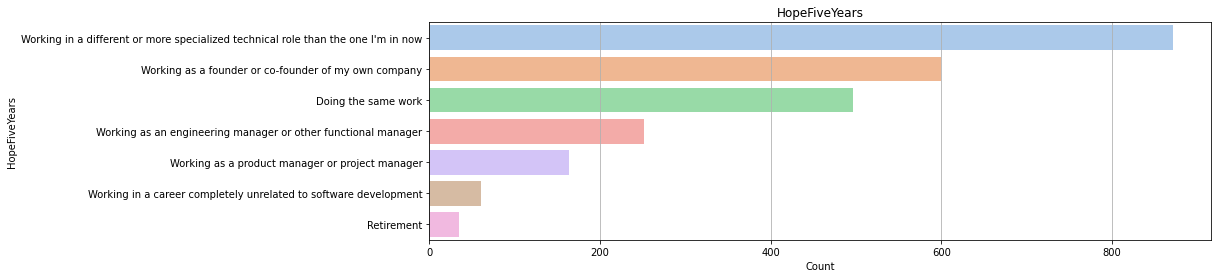

In [162]:
plt.figure(figsize=(14,4))
plt.grid()
sns.countplot(data=df, y='HopeFiveYears', order=df.HopeFiveYears.value_counts().index, palette='pastel')
plt.title('HopeFiveYears')
plt.xlabel('Count')
plt.show()

# AgreeDisagree

In [163]:
'''
data = []
pattern = re.compile('\? (.*)$')
scale = ['Strongly disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly agree']
mapper = {name:value for value, name in enumerate(scale, 1)}

for col in df[['AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3']].dropna().applymap(lambda x: mapper[x]).mean(axis=0).sort_values(ascending=False).index:
    plot_df = df[col].dropna().apply(lambda x: mapper[x])
    data.append(go.Box(y = plot_df,
                       boxmean = True,
                       ))
    
layout = go.Layout(title = 'To what extent do you agree or disagree with the following statements.',
                   xaxis = dict(showticklabels=False),
                   yaxis = dict(tickvals = list(range(1, len(scale)+1)),
                                tickangle = -60,
                                ticktext = scale),
                   legend=dict(x=0, y=-10))

fig = go.Figure(data=data, layout=layout)
iplot(fig)
'''

"\ndata = []\npattern = re.compile('\\? (.*)$')\nscale = ['Strongly disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly agree']\nmapper = {name:value for value, name in enumerate(scale, 1)}\n\nfor col in df[['AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3']].dropna().applymap(lambda x: mapper[x]).mean(axis=0).sort_values(ascending=False).index:\n    plot_df = df[col].dropna().apply(lambda x: mapper[x])\n    data.append(go.Box(y = plot_df,\n                       boxmean = True,\n                       ))\n    \nlayout = go.Layout(title = 'To what extent do you agree or disagree with the following statements.',\n                   xaxis = dict(showticklabels=False),\n                   yaxis = dict(tickvals = list(range(1, len(scale)+1)),\n                                tickangle = -60,\n                                ticktext = scale),\n                   legend=dict(x=0, y=-10))\n\nfig = go.Figure(data=data, layout=layout)\niplot(fig)\n"

# Age

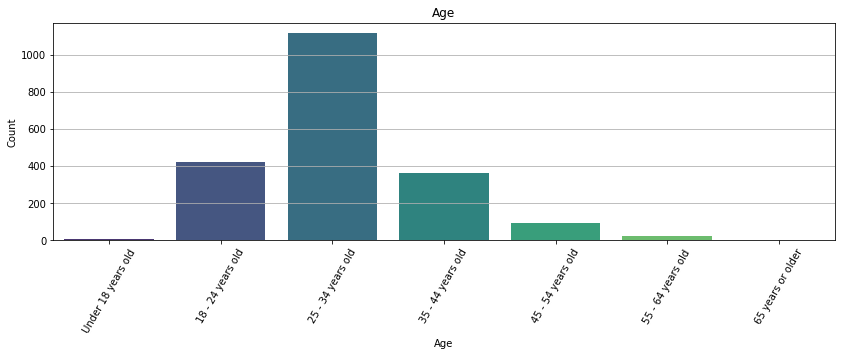

In [164]:
order_age = ['Under 18 years old', '18 - 24 years old', '25 - 34 years old', '35 - 44 years old', '45 - 54 years old', '55 - 64 years old', '65 years or older']

plt.figure(figsize=(14,4))
plt.grid()
sns.countplot(data=df, x='Age', order=order_age, palette='viridis')
plt.title('Age')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

To avoid data leakage we split the dataset before data preparation and apply data preparation only to training set.

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


In [166]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2356, 66)
(2356, 2)
(590, 66)
(590, 2)


# Feature Extraction from the training set only.

In [167]:
print('Minimum loan is:',x["LOAN_AMT"].min())
print('Maximum loan is:',x["LOAN_AMT"].max())

Minimum loan is: 1000
Maximum loan is: 35000


In [168]:
x_train.head(1)

,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68516507,14000,Compliance Review Unit Supervisor,ASSOCIATE STAFF ANALYST,Asst Comm Bdgt & Clmng-Financ,"As part of the Systems Support Office (SSO), t...",1. A masterâ€™s degree from an accredited coll...,NaN,Section 424-A of the New York Social Services ...,"Click on the ""Apply Now"" button.",NaN,New York City residency is generally required ...,2016-08-05T00:00:00.000,2016-08-08T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",More than 4 years ago,I received negative feedback on my job perform...,Confluence,One to three months,Received on-the-job training in software devel...,The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Disagree,C#;JavaScript;SQL;HTML;CSS,C#;JavaScript;Objective-C;SQL;HTML;CSS,SQL Server,SQL Server;MySQL;PostgreSQL;Microsoft Azure (T...,Windows Desktop or Server,Android;iOS;SharePoint,NaN,Angular;.NET Core,Sublime Text;Visual Studio,Windows,Scrum,NaN,Once a day,Increasing automation of jobs,"Evolving definitions of ""fairness"" in algorith...",A governmental or other regulatory body,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,4 years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,medical,Medical expenses,439xx,OH,15.97,Dec-97,19-Jan,450.79,NaN,19-Jan


In [169]:
x_train.iloc[:, :10]

,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift
id,,,,,,,,,,
68516507,14000,Compliance Review Unit Supervisor,ASSOCIATE STAFF ANALYST,Asst Comm Bdgt & Clmng-Financ,"As part of the Systems Support Office (SSO), t...",1. A masterâ€™s degree from an accredited coll...,NaN,Section 424-A of the New York Social Services ...,"Click on the ""Apply Now"" button.",NaN
68475247,5000,"Director, Deep Energy Retrofit Program",ADMINISTRATIVE CONSTRUCTION PR,Office of Energy Conservatio,The Department of Citywide Administrative Serv...,At least six years of full-time satisfactory e...,The preferred candidate will bring the followi...,NaN,Please go to www.nyc.gov/jobs or www.nyc.gov/e...,NaN
68506309,21000,Senior Capital Budget Analyst,ACCOUNTANT,Admin/Payments,Only candidates who filed for the Accountant t...,1. A baccalaureate degree from an accredited c...,Preference will be given to candidates who pos...,NaN,"For City Employees, please go to Employee Self...",35 Hours
68386391,6400,Staff Analyst,STAFF ANALYST,Lead Hazard Control Department,The New York City Housing Authority (NYCHA) is...,1. A masterâ€™s degree from an accredited coll...,1.\tExperience with public housing. 2.\tExper...,"NYCHA employees applying for promotional, titl...","Click the ""apply now"" button.",NaN
68496376,8000,CONTRACTS ATTORNEY,AGENCY ATTORNEY,LongTerm Planning&Sustainablty,The NYC Department of Environmental Protection...,1. Admission to the New York State Bar; and ei...,NaN,DEP is an equal opportunity employer with a st...,"Click on the ""Apply Now"" button.",35 hours
...,...,...,...,...,...,...,...,...,...,...
68475953,9000,PROJECT MANAGER,HOUSING DEVELOPMENT SPECIALIST,R E Dev For New Construction,"Job Description In December 2018, Mayor de Bl...",1. A baccalaureate degree from an accredited c...,Preferred Skills 1.Technical knowledge relate...,"NYCHA employees applying for promotional, titl...","Click the ""Apply Now"" button.",NaN
68475140,10000,"Program Manager, Clean Energy",ADMINISTRATIVE CONSTRUCTION PR,Office of Energy Conservatio,The Department of Citywide Administrative Serv...,At least six years of full-time satisfactory e...,The ideal candidate will bring the following s...,NaN,Please go to www.nyc.gov/jobs or www.nyc.gov/e...,NaN
68613638,14275,Construction Project Manager I,CONSTRUCTION PROJECT MANAGER,Facilities Maintenance,Non 55-a Program candidates will be required t...,1. A four-year high school diploma or its educ...,The ideal candidate will bring the following s...,Note: This position is open to qualified perso...,All resumes are to be submitted electronically...,NaN


# Dealing with missing values

check unqiue values in Division/Work Unit



In [170]:
np.unique(x_train['Division/Work Unit'])




array(['24th Precinct Civilian/Cadet', '311 Operations',
       'A/C Prop Exemp Adm', 'ACCO Office', 'AEP',
       'APM - Policy and Operations', 'Acco/Contracts',
       'Accountability Office', 'Adm/Human Resources & Training',
       'Admin Agen. And Elec Offic', 'Admin Executive Offices',
       'Admin Law and Regulatory Lit.', 'Admin Services',
       'Admin, GC, PI & Exec', 'Admin/Acco-Executive',
       'Admin/Acco-Prof Contracts', 'Admin/Budget',
       'Admin/Budget & Finance-Exec', 'Admin/Budget-Infra',
       'Admin/Hr-Train and Staff Devel', 'Admin/Oper & Facilities-Exec',
       'Admin/Payments', 'Administration', 'Administration & Planning',
       'Administration of Justice', 'Administration-MO',
       'Administration/Audits Account', 'Administration/Executive',
       'Administration/Lefrak', 'Administration/P S Budget',
       'Administration/Payroll Office', 'Administration/Personnel Srv',
       'Administration/Procurement', 'Administration/Revenue Cla',
       'Adm

In [171]:
x_train['Division/Work Unit'].value_counts()

Executive Management              49
Central Brookly City Operation    29
Administration                    28
Citywide Cybersecurity            25
Default                           25
                                  ..
Process Control                    1
Preventive Maintenance             1
MODA-Mayor's Off Data Analytic     1
Water Register/Inspect Bklyn       1
Capital Planning Development       1
Name: Division/Work Unit, Length: 640, dtype: int64

check unqiue values in Division/Work Unit

In [172]:
#np.unique(x_train['Minimum Qual Requirements'])


In [173]:
x_train['Minimum Qual Requirements'].value_counts()

1. A baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above; or  2. High school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above; or  3. Education and/or experience which is equivalent to "1" or "2" above. However, all candidates must have at least one year of experience as described in "1" above.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [174]:
a=x_train.shape
print('the shape of x_train is ',a)

b= percent_missing = x_train.isnull().sum() * 100 / len(x_train)
print('total null values in x_train is ',b)


the shape of x_train is  (2356, 66)
total null values in x_train is  LOAN_AMT                0.000000
Business Title          0.000000
Civil Service Title     0.000000
Division/Work Unit      0.000000
Job Description         0.000000
                         ...    
earliest_cr_line        0.000000
last_pymnt_d            0.000000
last_pymnt_amnt         0.000000
next_pymnt_d           88.539898
last_credit_pull_d      0.000000
Length: 66, dtype: float64


check unqiue values in Preferred Skills

next_pymnt_d has 70.80 %missing values so we delete this column

In [175]:
#np.unique(x_train['Preferred Skills'])
x_train['Preferred Skills'].value_counts()

ERROR: #NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             35
Interested candidates should have excellent

In [176]:
del x_train['next_pymnt_d']

In [177]:
b= percent_missing = x_train.isnull().sum() * 100 / len(x_train)
print('total null values in x_train is ',b)

total null values in x_train is  LOAN_AMT               0.0
Business Title         0.0
Civil Service Title    0.0
Division/Work Unit     0.0
Job Description        0.0
                      ... 
dti                    0.0
earliest_cr_line       0.0
last_pymnt_d           0.0
last_pymnt_amnt        0.0
last_credit_pull_d     0.0
Length: 65, dtype: float64


In [178]:
s = x_train.isnull().sum(axis=0)

z = np.round(x_train.isnull().sum(axis=0) / x_train.fillna(0).count(axis=0),2)


missing_df = pd.DataFrame({'missing_vals' : s,
             'missing_ratio' : z})

missing_df = missing_df[missing_df.missing_vals.ne(0)]
print(missing_df)

                           missing_vals  missing_ratio
Minimum Qual Requirements            15           0.01
Preferred Skills                    309           0.13
Additional Information              886           0.38
To Apply                              1           0.00
Hours/Shift                        1641           0.70
Residency Requirement                 3           0.00
Posting Date                          3           0.00
Posting Updated                       3           0.00
Process Date                          3           0.00
FormalEducation                      42           0.02
UndergradMajor                      255           0.11
DevType                              39           0.02
YearsCoding                           3           0.00
YearsCodingProf                     327           0.14
HopeFiveYears                       376           0.16
JobSearchStatus                     349           0.15
LastNewJob                          357           0.15
UpdateCV  

Hours/Shift contains 70% of the missing values so we shall delete this colums

In [179]:
x_train['Hours/Shift'].value_counts()
#np.unique(x_train['Hours/Shift'])


35 Hours                                                                                                                                                                               106
35 hours per week                                                                                                                                                                       42
Day - Due to the necessary technical support duties of this position in a 24/7 operation, candidate may be required to work various shifts such as weekends and/or nights/evenings.     32
35 hours per week / day                                                                                                                                                                 28
35hrs                                                                                                                                                                                   23
                                                                 

In [180]:
del x_train['Hours/Shift']



TimeafterBootcapmp has 93% missing values and HackathonReasons has 72% missing values.Lets check if we can perform any technique or simply delete them

In [181]:
x_train[['TimeAfterBootcamp','HackathonReasons']]
#np.unique(df['TimeAfterBootcamp'])

,TimeAfterBootcamp,HackathonReasons
id,,
68516507,NaN,NaN
68475247,NaN,To improve my general technical skills or prog...
68506309,NaN,NaN
68386391,NaN,To improve my general technical skills or prog...
68496376,Less than a month,To improve my general technical skills or prog...
...,...,...
68475953,NaN,NaN
68475140,NaN,NaN
68613638,NaN,NaN


In [182]:
d_type=x_train['Minimum Qual Requirements']
d_type.dtypes
d_type

id
68516507    1. A masterâ€™s degree from an accredited coll...
68475247    At least six years of full-time satisfactory e...
68506309    1. A baccalaureate degree from an accredited c...
68386391    1. A masterâ€™s degree from an accredited coll...
68496376    1. Admission to the New York State Bar; and ei...
                                  ...                        
68475953    1. A baccalaureate degree from an accredited c...
68475140    At least six years of full-time satisfactory e...
68613638    1. A four-year high school diploma or its educ...
68486448    A baccalaureate degree from an accredited coll...
67478211    Six months of satisfactory, full-time experien...
Name: Minimum Qual Requirements, Length: 2356, dtype: object

In [183]:
t=x_train['Minimum Qual Requirements'] = x_train['Minimum Qual Requirements'].apply(lambda x: type(x).__name__)
t

id
68516507    str
68475247    str
68506309    str
68386391    str
68496376    str
           ... 
68475953    str
68475140    str
68613638    str
68486448    str
67478211    str
Name: Minimum Qual Requirements, Length: 2356, dtype: object

In [184]:
t.apply(type).value_counts()

<class 'str'>    2356
Name: Minimum Qual Requirements, dtype: int64

deleting first ten columns except loan_amt

In [ ]:
x_train.drop(["Business Title","Civil Service Title","Division/Work Unit","Job Description","Minimum Qual Requirements","Preferred Skills","Additional Information","To Apply"], axis=1, inplace=True)

In [192]:
x_train.head()

,LOAN_AMT,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68516507,14000,3-5 years,3-5 years,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",More than 4 years ago,I received negative feedback on my job perform...,Confluence,One to three months,Received on-the-job training in software devel...,The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Disagree,C#;JavaScript;SQL;HTML;CSS,C#;JavaScript;Objective-C;SQL;HTML;CSS,SQL Server,SQL Server;MySQL;PostgreSQL;Microsoft Azure (T...,Windows Desktop or Server,Android;iOS;SharePoint,NaN,Angular;.NET Core,Sublime Text;Visual Studio,Windows,Scrum,NaN,Once a day,Increasing automation of jobs,"Evolving definitions of ""fairness"" in algorith...",A governmental or other regulatory body,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,4 years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,medical,Medical expenses,439xx,OH,15.97,Dec-97,19-Jan,450.79,19-Jan
68475247,5000,18-20 years,6-8 years,Doing the same work,I am actively looking for a job,More than 4 years ago,I had a negative experience or interaction at ...,"Jira;Slack;Other wiki tool (Github, Google Sit...",Less than a month,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To improve my general technical skills or prog...,Disagree,Agree,Agree,Java;JavaScript;SQL;HTML;CSS,Java;JavaScript;Python;HTML;CSS,MySQL,NaN,Firebase,Raspberry Pi;Firebase,Node.js;React,Node.js;React,Eclipse;Notepad++;Vim;Visual Studio Code,Windows,Agile;Kanban;Pair programming;Scrum,Subversion;Copying and pasting files to networ...,Multiple times per day,Artificial intelligence surpassing human intel...,Increasing automation of jobs,A governmental or other regulatory body,I'm worried about the dangers more than I'm ex...,25 - 34 years old,36 months,8 years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car financing,380xx,TN,16.17,7-Aug,17-Mar,3.66,17-Feb
68506309,21000,0-2 years,0-2 years,Working as a founder or co-founder of my own c...,I am actively looking for a job,Between 1 and 2 years ago,NaN,Facebook;Google Hangouts/Chat,Less than a month,Taken an online course in programming or softw...,NaN,NaN,NaN,Disagree,Disagree,Disagree,Assembly;C;C++;C#;Java;JavaScript;PHP;SQL;VB.N...,C#;Java;JavaScript;PHP;SQL;VB.NET;HTML;CSS,SQL Server;MySQL;SQLite;Oracle;MariaDB,SQL Server;MySQL;SQLite;Oracle;MariaDB,Android;Arduino;ESP8266;WordPress,Android;Apple Watch or Apple TV;Arduino;ESP826...,.NET Core,Angular;.NET Core;Node.js;React;Xamarin,Android Studio;Atom;NetBeans;Notepad++;Sublime...,Windows,NaN,I don't use version control,NaN,NaN,Artificial intelligence surpassing human intel...,Nobody,I'm excited about the possibilities more than ...,18 - 24 years old,60 months,10+ years,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,074xx,NJ,28.41,Mar-86,19-Mar,488.53,19-Mar
68386391,6400,0-2 years,0-2 years,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",Less than a year ago,A recruiter contacted me,Slack;Trello,One to three months,Taken a part-time in-person course in programm...,Questions & answers on Stack Overflow;Online d...,NaN,To im

In [195]:
x_train["YearsCoding"].min()

TypeError: ignored

**LOAN_AMT-shows the amount of loan and looks important	**
Business Title-can be used to group categories of people based on title-(otpional feature)	
Civil Service Title- repetative column compared to buisness title(REDUNDANT)	
Division/Work Unit-this has 640 types of divisons/work. We cannot use this so we will remove this column aswell.	
Job Description- JD is redundant	
Minimum Qual Requirements	has (str 2341,float 15) which really doesnt give us significant information.
Preferred Skills has string values which cannot be used unless we are focusing on nlp models so lets ignore this	
Additional 
Information	: This column is redundant
To Apply	: This column doesnt give much insight
Hours/Shift: It has 70% missing data so its better to remove this column.

In [ ]:
x_train.drop(["Residency Requirement","Posting Date","Posting Updated","Process Date","FormalEducation","UndergradMajor","CompanySize","DevType"], axis=1, inplace=True)


In [ ]:
x_train.head()

YearsCoding: This column represents the years of coding by an individual. If its converted into usable quantitave numericals,it can be used as a feature.(Potential Feature) 	
YearsCodingProf: This column referes to professional coding.	
HopeFiveYears	
JobSearchStatus	
LastNewJob	
UpdateCV	
CommunicationTools	
TimeFullyProductive	
EducationTypes	
SelfTaughtTypes	

https://docs.google.com/document/d/1gvi7wJdzLy057UgYioD1TuFWqtd9OKBBHdoG_pBpX5I/edit

In [ ]:
c=y_train.shape
print('the shape of x_train is ',c)

d=y_train.isnull().sum()
print('total null values in x_train is ',d)